In [96]:
import os
import cv2
import pickle
from tqdm import tqdm
import numpy as np
import skimage.io
from sklearn.cluster import KMeans
from skimage.color import rgb2gray
from skimage.feature import local_binary_pattern
import random
from sklearn.metrics import accuracy_score
# Import packages
from sklearn import svm
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import numpy as np
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
 

In [75]:
src1 = 'Data/train/flooded/'
src2 = 'Data/train/non-flooded/'
image_paths_1 = os.listdir(src1)
image_paths_1 = [src1+ s for s in image_paths_1]
image_paths_2 = os.listdir(src2)
image_paths_2 = [src2+ s for s in image_paths_2]
image_paths = image_paths_1 + image_paths_2
print(len(image_paths))

644


In [76]:
# Define parameters for LBP feature extraction
radius = 1
n_points = 8
METHOD = 'uniform'

In [77]:
print(len(image_paths))

644


In [78]:
grey_images = [ [] ] * len(image_paths)
lbp_features = [ [] ] * len(image_paths)
lbp_histograms = [ [] ] * len(image_paths)
labels=[]
i = 0
for image_path in tqdm(image_paths):
    image = skimage.io.imread(image_path)
    mean_image = cv2.resize(image, (224, 224), interpolation=cv2.INTER_AREA)
    grey_image = rgb2gray(mean_image)
    grey_images[i] = grey_image
    lbp = local_binary_pattern(grey_image, n_points, radius, METHOD)
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    lbp_features[i] = lbp
    lbp_histograms[i] = hist
    if "non" in image_path:
        labels.append(0)
    else:
        labels.append(1)
    i += 1

  0%|          | 0/644 [00:00<?, ?it/s]c:\Users\rorod\miniforge3\envs\new_python_nlp\lib\site-packages\skimage\feature\texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
100%|██████████| 644/644 [00:32<00:00, 19.66it/s]


In [79]:
len(lbp_features), lbp_features[0].shape

(644, (224, 224))

In [80]:
temp = list(zip(lbp_features, labels))
random.shuffle(temp)
lbp_features, labels = zip(*temp)

In [81]:
lbp_features= np.array(lbp_features)

In [82]:
nsamples, nx, ny = lbp_features.shape

In [83]:
d2_train_dataset = lbp_features.reshape((nsamples,nx*ny))

In [84]:
d2_train_dataset.shape

(644, 50176)

In [85]:


clf = svm.SVC(kernel='poly', C=3)

clf.fit(d2_train_dataset, labels)

SVC(C=3, kernel='poly')

In [86]:
src1 = 'Data/val/flooded/'
src2 = 'Data/val/non-flooded/'
image_paths_1 = os.listdir(src1)
image_paths_1 = [src1+ s for s in image_paths_1]
image_paths_2 = os.listdir(src2)
image_paths_2 = [src2+ s for s in image_paths_2]
image_paths = image_paths_1 + image_paths_2
print(len(image_paths))

138


In [87]:
grey_images_val = [ [] ] * len(image_paths)
lbp_features_val = [ [] ] * len(image_paths)
lbp_histograms_val = [ [] ] * len(image_paths)
labels_val=[]
i = 0
for image_path in tqdm(image_paths):
    image = skimage.io.imread(image_path)
    mean_image = cv2.resize(image, (224, 224), interpolation=cv2.INTER_AREA)
    grey_image = rgb2gray(mean_image)
    grey_images_val[i] = grey_image
    lbp = local_binary_pattern(grey_image, n_points, radius, METHOD)
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    lbp_features_val[i] = lbp
    lbp_histograms_val[i] = hist
    if "non" in image_path:
        labels_val.append(0)
    else:
        labels_val.append(1)
    i += 1

  0%|          | 0/138 [00:00<?, ?it/s]c:\Users\rorod\miniforge3\envs\new_python_nlp\lib\site-packages\skimage\feature\texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
100%|██████████| 138/138 [00:07<00:00, 18.62it/s]


In [88]:
lbp_features_val=np.array(lbp_features_val)

In [89]:
nsamples, nx, ny = lbp_features_val.shape

In [90]:
d2_val_dataset = lbp_features_val.reshape((nsamples,nx*ny))

In [91]:


predictions=clf.predict(d2_val_dataset)



In [92]:

# Finding the accuracy.
accuracy = accuracy_score(labels_val,predictions)
print("Accuracy   :", accuracy)


Accuracy   : 0.5434782608695652


In [93]:


clf = svm.SVC(kernel='rbf', C=3)

clf.fit(d2_train_dataset, labels)

SVC(C=3)

In [94]:
predictions=clf.predict(d2_val_dataset)


In [95]:


# Finding the accuracy.
accuracy = accuracy_score(labels_val,predictions)
print("Accuracy   :", accuracy)



Accuracy   : 0.7753623188405797


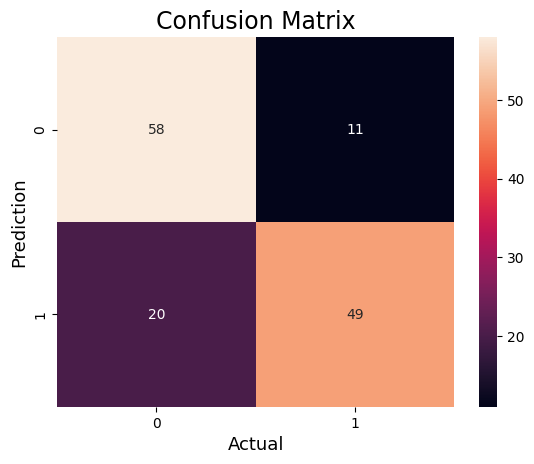

In [98]:


# Compute the confusion matrix.
cm = confusion_matrix(labels_val,predictions)
# Plot the confusion matrix.
# Plot the confusion matrix.
new_labels = list(set(labels_val))
new_labels.sort()
sns.heatmap(cm, annot=True, fmt='g', xticklabels=new_labels, yticklabels=new_labels)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [102]:


clf = svm.SVC(kernel='rbf', C=3,gamma=0.05)

clf.fit(d2_train_dataset, labels)

SVC(C=3, gamma=0.05)

In [103]:


# Finding the accuracy.
accuracy = accuracy_score(labels_val,predictions)
print("Accuracy   :", accuracy)


Accuracy   : 0.7753623188405797


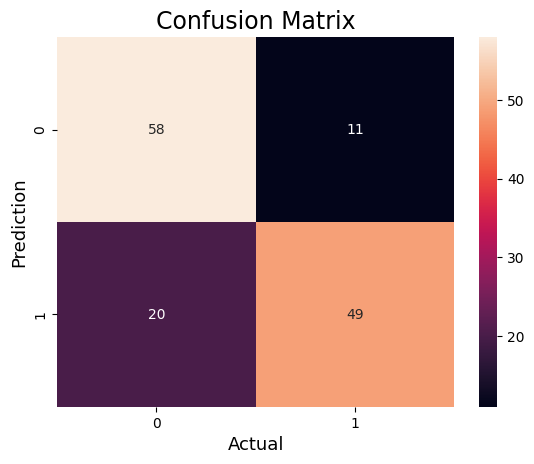

In [104]:


# Compute the confusion matrix.
cm = confusion_matrix(labels_val,predictions)
# Plot the confusion matrix.
# Plot the confusion matrix.
new_labels = list(set(labels_val))
new_labels.sort()
sns.heatmap(cm, annot=True, fmt='g', xticklabels=new_labels, yticklabels=new_labels)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()